# Vader model for financial tweet sentiment analysis

### Setup environment

In [ ]:
import pandas as pd
import os
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
pip install datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 9543
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2388
    })
})

Vader Model

In [ ]:
sid = SentimentIntensityAnalyzer()

def compute_sentiment_score(example):
    scores = sid.polarity_scores(example['text'])
    return {'positive_score': scores['pos'], 'negative_score': scores['neg'], 'neutral_score': scores['neu']}

dataset['train'] = dataset['train'].map(compute_sentiment_score)
dataset['validation'] = dataset['validation'].map(compute_sentiment_score)

train_df = pd.DataFrame(dataset['train'])
validation_df = pd.DataFrame(dataset['validation'])

Map:   0%|          | 0/9543 [00:00<?, ? examples/s]

Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

In [ ]:
train_df

,text,label,positive_score,negative_score,neutral_score
0,$BYND - JPMorgan reels in expectations on Beyo...,0,0.000,0.000,1.000
1,$CCL $RCL - Nomura points to bookings weakness...,0,0.000,0.189,0.811
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,0.148,0.284,0.568
3,$ESS: BTIG Research cuts to Neutral https://t....,0,0.000,0.268,0.732
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,0.000,0.208,0.792
...,...,...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,0.000,0.185,0.815
9539,Tupperware Brands among consumer gainers; Unil...,2,0.000,0.298,0.702
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,0.000,0.254,0.746
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,0.000,0.000,1.000


In [ ]:
validation_df

,text,label,positive_score,negative_score,neutral_score
0,$ALLY - Ally Financial pulls outlook https://t...,0,0.000,0.000,1.000
1,"$DELL $HPE - Dell, HPE targets trimmed on comp...",0,0.000,0.000,1.000
2,$PRTY - Moody's turns negative on Party City h...,0,0.218,0.298,0.484
3,$SAN: Deutsche Bank cuts to Hold,0,0.000,0.306,0.694
4,$SITC: Compass Point cuts to Sell,0,0.000,0.306,0.694
...,...,...,...,...,...
2383,Stocks making the biggest moves midday: TD Ame...,2,0.000,0.000,1.000
2384,Stocks making the biggest moves premarket: Fit...,2,0.000,0.000,1.000
2385,Stocks making the biggest moves premarket: Hom...,2,0.000,0.000,1.000
2386,Stocks making the biggest moves premarket: TD ...,2,0.000,0.000,1.000


Confusion Matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Compute the sentiment with Vader
def categorize_sentiment(row):
    # Set up the threshold
    positive_threshold = 0.05
    negative_threshold = -0.05
    # Set the label according the threshold
    if row['positive_score'] >= positive_threshold:
        return 'Positive'
    elif row['negative_score'] > positive_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# apply this function to validation_df to create "predicted_label"
validation_df['predicted_label'] = validation_df.apply(categorize_sentiment, axis=1)


In [ ]:
validation_df

,text,label,positive_score,negative_score,neutral_score,predicted_label
0,$ALLY - Ally Financial pulls outlook https://t...,0,0.000,0.000,1.000,Neutral
1,"$DELL $HPE - Dell, HPE targets trimmed on comp...",0,0.000,0.000,1.000,Neutral
2,$PRTY - Moody's turns negative on Party City h...,0,0.218,0.298,0.484,Positive
3,$SAN: Deutsche Bank cuts to Hold,0,0.000,0.306,0.694,Negative
4,$SITC: Compass Point cuts to Sell,0,0.000,0.306,0.694,Negative
...,...,...,...,...,...,...
2383,Stocks making the biggest moves midday: TD Ame...,2,0.000,0.000,1.000,Neutral
2384,Stocks making the biggest moves premarket: Fit...,2,0.000,0.000,1.000,Neutral
2385,Stocks making the biggest moves premarket: Hom...,2,0.000,0.000,1.000,Neutral
2386,Stocks making the biggest moves premarket: TD ...,2,0.000,0.000,1.000,Neutral


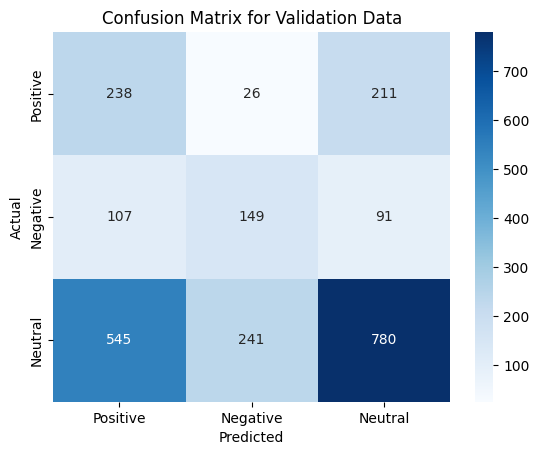

In [ ]:

label_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
validation_df['actual_label'] = validation_df['label'].map(label_mapping)

cm = confusion_matrix(validation_df['actual_label'], validation_df['predicted_label'], labels=['Positive', 'Negative', 'Neutral'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Validation Data')
plt.show()
